# PyTorch Computer vision

Basics of Computer vision - https://www.ibm.com/topics/computer-vision

CNN - https://insightsimaging.springeropen.com/articles/10.1007/s13244-018-0639-9

## Computer vision libraries in PyTorch

* `torchvision` - Base domain library for pytorch CV - https://pytorch.org/vision/stable/index.html
* `torchvision.datasets` - get datasets and data loading functions for CV here
* `torchvision.models` -  pretrained CV models you can leverage for any CV problems
* `torchvision.transform` - turns image data to dataset (numbers) suitable for vision model
* `torch.utils.data.Datasets` - Base dataset class fpr pytorch
* `torch.utils.data.DataLoader` - Creates a python iterable over a dataset

In [1]:
# Import torch
import torch
from torch import nn  # nn has all of PyTorch's building blocks for neural networks

# import torchvision related
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor #Converts PIL image or numpy ndarray to tensor
from torch.utils.data import DataLoader

# Import oher key libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import Markdown as md
print(torch.__version__)
print(torchvision.__version__)

2.4.1+cu121
0.19.1+cu121


# 1.Get data -- FashionMNIST

* Typically we can get images from Imagenet using -- `imagenet_data = torchvision.datasets.ImageNet('path/to/imagenet_root/')`
* We can get nemerous datasets from here - https://pytorch.org/vision/stable/datasets.html
* currently using FashionMNIST - https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST

In [2]:
# Get train data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data" , # Where to download the data to?
    train=True, # Dataset from FashionMNIST is divided by train and test already. Here we need to tell if we need train or Test
    download=True, # Do we want to download?
    transform=ToTensor(), # Transform the image to tensor
    target_transform=None # Do not transform the target
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:02<00:00, 12858219.89it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 203519.63it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:06<00:00, 661990.15it/s] 


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6607183.90it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
img, label = train_data[0]
label, img

(9,
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.00

In [5]:
# See all classes
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
# Class to its index
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets  # Gives target or y variable of the training data

tensor([9, 0, 0,  ..., 3, 0, 5])

## 1.1 Visualiza data

In [8]:
# Lets check shape of our image --  remember training data is a tuple of x and y respectively
train_data[0][0].shape, train_data[0][1]

(torch.Size([1, 28, 28]), 9)

In [9]:
# setting the image and label again for quick reference
img, label = train_data[0]

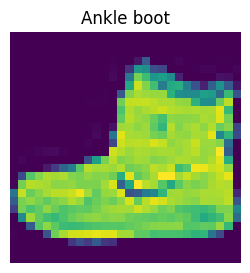

In [10]:
plt.figure(figsize=(3,3))
plt.imshow(img.squeeze()) # Removing the channel dimension as the channel dim = 1 anyway!
plt.title(train_data.classes[label])
plt.axis(False)
plt.show()

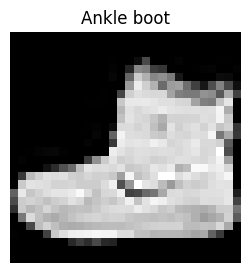

In [11]:
# Same image in gray scale
plt.figure(figsize=(3,3))
plt.imshow(img.squeeze(),cmap = "gray")
plt.title(train_data.classes[label])
plt.axis(False)
plt.show()

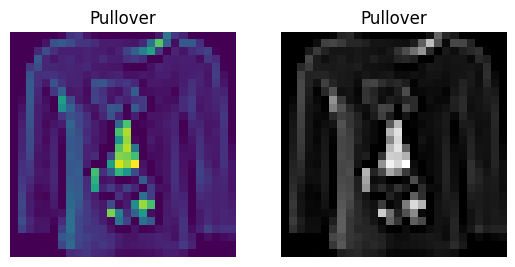

In [12]:
# Lets get a random image
img, label = train_data[np.random.randint(len(train_data))]
plt.subplot(1,2,1)
plt.imshow(img.squeeze()) # Removing the channel dimension as the channel dim = 1 anyway!
plt.title(train_data.classes[label])
plt.axis(False)
plt.subplot(1,2,2)
plt.imshow(img.squeeze(),cmap = "gray")
plt.title(train_data.classes[label])
plt.axis(False)
plt.show()

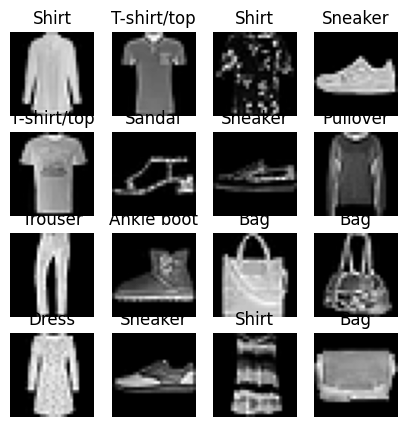

In [13]:
torch.manual_seed(80)
fig = plt.figure(figsize=(5,5))
r,c = 4,4

for i in range(r*c):
  random_idx = torch.randint(0,len(train_data),(1,)).item()
  img, label = train_data[random_idx]
  fig.add_subplot(r,c,i+1)
  plt.imshow(img.squeeze(),cmap = "gray")
  plt.title(train_data.classes[label])
  plt.axis(False)
plt.show()


# 2.Prepare DataLoader

Currently the data is in pytorch datasets.

This needs to be converted from Pytorch datasets to PyTorch iterable.

Specifically, we want to convert our data into batches(mini batches)

Why do we do it?

1.Memory efficiency - can be broken down to batch of 32 images
2. Better algo than SGD or Full GD

In [14]:
# Info about the train and test data
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [15]:
BATCH_SIZE = 32

train_data_batches = DataLoader(train_data,
                                batch_size = BATCH_SIZE,
                                shuffle = True)

test_data_batches = DataLoader(test_data,
                                batch_size = BATCH_SIZE,
                                shuffle = False)


In [16]:
print(f"number of batches we got for train: {len(train_data_batches)}")
print(f"number of batches we got for test: {len(test_data_batches)}")

number of batches we got for train: 1875
number of batches we got for test: 313


Feature batch shape: torch.Size([32, 1, 28, 28])
Labels batch shape: torch.Size([32])


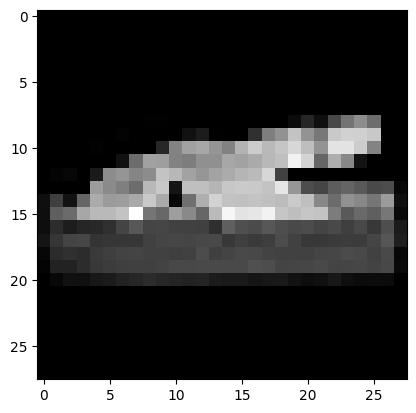

Label: Sandal


In [17]:
# Display image and label.
train_features, train_labels = next(iter(train_data_batches))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {train_data.classes[label]}")

In [18]:
# Check what is the type of train_data_batches
type(iter(train_data_batches))

torch.utils.data.dataloader._SingleProcessDataLoaderIter

# 3.Build baseline model

First we need to build a baseline model -- which is a simple model used as an initial model and we build further models to improve performance.

In almost all cases this is going to be a linear model

In [19]:
# create a flatten layer - Flattens a contiguous range of dims into a tensor.
flatten_model = nn.Flatten()

# Lets test how does the flatten work
a = train_features[0]  # this comes from 'next(iter(train_data_batches))'
print(a.size())

# Flatten the sample data extracted
b = flatten_model(a) # Perform forward pass
print(b.size())

torch.Size([1, 28, 28])
torch.Size([1, 784])


 The above conversion is important for the linear models

## 3.1 build a baseline model - linear model

In [20]:
class FaahionMNIST_v0_model(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int): # We can get parameters at the beginning so that we can call them with model subclass call
    super().__init__()
    self.linear_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )
  def forward(self,x):
    return self.linear_stack(x)

In [21]:
# Instantiate a model
torch.manual_seed(80)
Model_fashion_0 = FaahionMNIST_v0_model(input_shape = 28*28, # 28 is the W and H of the image
                                         hidden_units = 32,
                                         output_shape = len(train_data.classes))
Model_fashion_0

FaahionMNIST_v0_model(
  (linear_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=32, bias=True)
    (2): Linear(in_features=32, out_features=10, bias=True)
  )
)

## 3.2 Defining loss functon, Optimizer and performance metric

- Also adding a function to time the training process

In [22]:
# define a linear function and an optimizer - sticking with Crossentropy and SGD as loss and optimizers
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = Model_fashion_0.parameters(),lr = 0.1) # very high LR

In [23]:
# Define a evaluation metrics -- Accuracy for simplicity
def accuracy_fn(y_true, y_pred):
  correct_preds = torch.eq(y_true,y_pred).sum().item()
  acc = correct_preds/len(y_pred)
  return acc

In [24]:
# Creating a function to train our experiment
from timeit import default_timer as timer
def print_train_time(start:float, end:float, device:torch.device = None):
  """ Print diff bw  start and end time"""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")

In [25]:
# testing timer function
s = timer()
e = timer()
print_train_time(s,e)

Train time on None: 0.000 seconds


In [26]:
# predcict for a single batch
y_train_logits = Model_fashion_0(train_features).squeeze()
# y_pred[0]
y_pred_prob = torch.softmax(y_train_logits, dim=1)
y_pred_train = y_pred_prob.argmax(dim=1)
len(y_pred_train)

32

# 4.Train the Model

1. Loop through epochs
2. Loop through training batches, perform training steps and calculate loss **per bactch**
3. Loop through testing loop, perform testing steps and calculate loss **per bactch**
4. Print out all results

In [27]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# set seed and timer
torch.manual_seed(0)
train_start_time = timer()

# set epochs
epochs = 5

# Loop through epochs
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")

  # Training
  train_loss = 0
  # Add a loop to loop through training batches
  for batch, (train_img, train_label) in enumerate(train_data_batches):
    Model_fashion_0.train()
    # 1. Forward pass
    train_logits = Model_fashion_0(train_img).squeeze()
    y_pred_prob = torch.softmax(train_logits, dim=1)
    y_pred_train = y_pred_prob.argmax(dim=1)

    # 2. Calculate loss and accuracy
    loss = loss_fn(train_logits, train_label)
    train_loss += loss
    train_acc = accuracy_fn(y_true = train_label, y_pred = y_pred_train)

    # 3. set optimizer.zero_grad() and get backpropagation
    optimizer.zero_grad()
    loss.backward()

    # 4. Update parameters using an Optimizer
    optimizer.step()

  print(f"Avg train_loss after {epoch}: {train_loss.item()/len(train_data_batches):.4f}")

  # Testing
  test_loss, test_acc = 0,0
  Model_fashion_0.eval()
  with torch.inference_mode():
    for test_img, test_label in test_data_batches:
      # 1. forward pass
      test_logits = Model_fashion_0(test_img).squeeze()
      test_pred_prob = torch.softmax(test_logits, dim=1)
      test_pred = test_pred_prob.argmax(dim=1)

      # 2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_logits, test_label)

      # 3. Calculate accuracy (accumulatively)
      test_acc += accuracy_fn(y_true = test_label, y_pred=test_pred)

  print(f"Avg test_loss after {epoch}: {test_loss.item()/len(test_data_batches):.4f} and test_acc: {test_acc/len(test_data_batches):.4f}")

train_end_time = timer()

print_train_time(train_start_time, train_end_time)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------
Avg train_loss after 0: 0.5819
Avg test_loss after 0: 0.5107 and test_acc: 0.8204
Epoch: 1
-------
Avg train_loss after 1: 0.4741
Avg test_loss after 1: 0.4986 and test_acc: 0.8255
Epoch: 2
-------
Avg train_loss after 2: 0.4529
Avg test_loss after 2: 0.4611 and test_acc: 0.8351
Epoch: 3
-------
Avg train_loss after 3: 0.4431
Avg test_loss after 3: 0.4778 and test_acc: 0.8313
Epoch: 4
-------
Avg train_loss after 4: 0.4333
Avg test_loss after 4: 0.4722 and test_acc: 0.8300
Train time on None: 47.337 seconds


Takes 78 seconds to run on (my) CPU and takes 53 seconds on T4 GPU and takes 47 seconds with TPU v2

# 5.Make predictions and get Model 0 results

In [28]:
torch.manual_seed(0)
# Model_fashion_0.eval()
def eval_model(model:nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  """ Returns a dictionary containing the results of model predicting on data loader"""
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for x,y in tqdm(data_loader):
      logits = model(x).squeeze()
      y_pred_prob = torch.softmax(logits, dim=1)
      y_pred = y_pred_prob.argmax(dim=1)
      loss += loss_fn(logits, y)
      acc += accuracy_fn(y_true = y, y_pred = y_pred)
  results = {"model_name": model.__class__.__name__,
             "model_loss": loss.item()/len(data_loader),
             "model_acc": acc/len(data_loader)}
  return results

In [29]:
eval_model(Model_fashion_0, test_data_batches,loss_fn, accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FaahionMNIST_v0_model',
 'model_loss': 0.47219663382338256,
 'model_acc': 0.8299720447284346}

In [30]:
len(test_data_batches)

313

# 6.Build a non linear model

* We could add non linearity into the model and also can add more layers to improve performance

In [31]:
# Define the model class
class FaahionMNIST_v1_non_lin(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int): # We can get parameters at the beginning so that we can call them with model subclass call
    super().__init__()
    self.linear_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )
  def forward(self,x):
    return self.linear_stack(x)

In [32]:
# Instantiate a model
torch.manual_seed(80)
Model_fashion_1 = FaahionMNIST_v1_non_lin(input_shape = 28*28, # 28 is the W and H of the image
                                         hidden_units = 32,
                                         output_shape = len(train_data.classes))
Model_fashion_1

FaahionMNIST_v1_non_lin(
  (linear_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=32, bias=True)
    (2): ReLU()
    (3): Linear(in_features=32, out_features=32, bias=True)
    (4): ReLU()
    (5): Linear(in_features=32, out_features=32, bias=True)
    (6): ReLU()
    (7): Linear(in_features=32, out_features=32, bias=True)
    (8): ReLU()
    (9): Linear(in_features=32, out_features=10, bias=True)
  )
)

In [33]:
# Define loss func and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = Model_fashion_1.parameters(),lr = 0.1) # very high LR

## 6.1 Train the non linear Model

In [34]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# set seed and timer
torch.manual_seed(0)
train_start_time = timer()

# set epochs
epochs = 15

# Loop through epochs
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")

  # Training
  train_loss = 0
  # Add a loop to loop through training batches
  for batch, (train_img, train_label) in enumerate(train_data_batches):
    Model_fashion_1.train()
    # 1. Forward pass
    train_logits = Model_fashion_1(train_img).squeeze()
    y_pred_prob = torch.softmax(train_logits, dim=1)
    y_pred_train = y_pred_prob.argmax(dim=1)

    # 2. Calculate loss and accuracy
    loss = loss_fn(train_logits, train_label)
    train_loss += loss
    train_acc = accuracy_fn(y_true = train_label, y_pred = y_pred_train)

    # 3. set optimizer.zero_grad() and get backpropagation
    optimizer.zero_grad()
    loss.backward()

    # 4. Update parameters using an Optimizer
    optimizer.step()

  print(f"Avg train_loss after {epoch}: {train_loss.item()/len(train_data_batches):.4f}")

  # Testing
  test_loss, test_acc = 0,0
  Model_fashion_1.eval()
  with torch.inference_mode():
    for test_img, test_label in test_data_batches:
      # 1. forward pass
      test_logits = Model_fashion_1(test_img).squeeze()
      test_pred_prob = torch.softmax(test_logits, dim=1)
      test_pred = test_pred_prob.argmax(dim=1)

      # 2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_logits, test_label)

      # 3. Calculate accuracy (accumulatively)
      test_acc += accuracy_fn(y_true = test_label, y_pred=test_pred)

  print(f"Avg test_loss after {epoch}: {test_loss.item()/len(test_data_batches):.4f} and test_acc: {test_acc/len(test_data_batches):.4f}")

train_end_time = timer()

print_train_time(train_start_time, train_end_time)

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 0
-------
Avg train_loss after 0: 0.8823
Avg test_loss after 0: 0.6138 and test_acc: 0.7674
Epoch: 1
-------
Avg train_loss after 1: 0.4772
Avg test_loss after 1: 0.4960 and test_acc: 0.8235
Epoch: 2
-------
Avg train_loss after 2: 0.4169
Avg test_loss after 2: 0.4283 and test_acc: 0.8410
Epoch: 3
-------
Avg train_loss after 3: 0.3878
Avg test_loss after 3: 0.4473 and test_acc: 0.8433
Epoch: 4
-------
Avg train_loss after 4: 0.3673
Avg test_loss after 4: 0.3991 and test_acc: 0.8587
Epoch: 5
-------
Avg train_loss after 5: 0.3514
Avg test_loss after 5: 0.3941 and test_acc: 0.8549
Epoch: 6
-------
Avg train_loss after 6: 0.3400
Avg test_loss after 6: 0.4296 and test_acc: 0.8514
Epoch: 7
-------
Avg train_loss after 7: 0.3300
Avg test_loss after 7: 0.3893 and test_acc: 0.8596
Epoch: 8
-------
Avg train_loss after 8: 0.3225
Avg test_loss after 8: 0.3676 and test_acc: 0.8676
Epoch: 9
-------
Avg train_loss after 9: 0.3141
Avg test_loss after 9: 0.3753 and test_acc: 0.8672
Epoch: 10


## 6.2 Evaluate performance of Non lin model

In [35]:
eval_model(Model_fashion_1, test_data_batches,loss_fn, accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FaahionMNIST_v1_non_lin',
 'model_loss': 0.4012298340233751,
 'model_acc': 0.8615215654952076}

# 7.Functionalize training and Test loops - to save code space

* training loop: train_step()
* test loop: test_step()

In [36]:
def training_step(model : nn.Module,
                  data_loader :  torch.utils.data.DataLoader,
                  loss_fn : torch.nn.Module,
                  optimizer : torch.optim.Optimizer,
                  accuracy_fn):
  """ Performns learning based on model and data_loader"""
  # Training
  train_loss, train_acc = 0, 0
  model.train()
  # Add a loop to loop through training batches
  for batch, (train_img, train_label) in enumerate(data_loader):
    # 1. Forward pass
    train_logits = model(train_img).squeeze()
    y_pred_prob = torch.softmax(train_logits, dim=1)
    y_pred_train = y_pred_prob.argmax(dim=1)

    # 2. Calculate loss and accuracy
    loss = loss_fn(train_logits, train_label)
    train_loss += loss
    acc = accuracy_fn(y_true = train_label, y_pred = y_pred_train)
    train_acc += acc

    # 3. set optimizer.zero_grad() and get backpropagation
    optimizer.zero_grad()
    loss.backward()

    # 4. Update parameters using an Optimizer
    optimizer.step()

  print(f"Avg train_loss: {train_loss.item()/len(data_loader):.4f} | Avg train_accuracy {train_acc/len(data_loader):.4f}")
  # return train_loss.item()/len(train_data_batches), train_acc/len(data_loader)

In [37]:
def testing_step(model : nn.Module,
                 data_loader :  torch.utils.data.DataLoader,
                 loss_fn : torch.nn.Module,
                 accuracy_fn):

  test_loss, test_acc = 0,0
  model.eval()
  with torch.inference_mode():
    for test_img, test_label in data_loader:
      # 1. forward pass
      test_logits = model(test_img).squeeze()
      test_pred_prob = torch.softmax(test_logits, dim=1)
      test_pred = test_pred_prob.argmax(dim=1)

      # 2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_logits, test_label)

      # 3. Calculate accuracy (accumulatively)
      test_acc += accuracy_fn(y_true = test_label, y_pred=test_pred)

  print(f"Avg test_loss after {epoch}: {test_loss.item()/len(data_loader):.4f} and test_acc: {test_acc/len(data_loader):.4f}")
  # return test_loss.item()/len(data_loader), test_acc/len(data_loader)

In [38]:
# import tqdm for progress bar
from tqdm.auto import tqdm
torch.manual_seed(0)
Model_fashion_1 = FaahionMNIST_v1_non_lin(input_shape = 28*28, # 28 is the W and H of the image
                                         hidden_units = 32,
                                         output_shape = len(train_data.classes))

# Define loss func and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = Model_fashion_1.parameters(),lr = 0.1) # very high LR
# set seed and timer
torch.manual_seed(0)
train_start_time = timer()

# set epochs
epochs = 5

# Loop through epochs
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  # Training
  training_step(Model_fashion_1, train_data_batches, loss_fn, optimizer, accuracy_fn)
  # Testing
  testing_step(Model_fashion_1, test_data_batches, loss_fn, accuracy_fn)

train_end_time = timer()

print_train_time(train_start_time, train_end_time)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------
Avg train_loss: 0.7867 | Avg train_accuracy 0.7050
Avg test_loss after 0: 0.5487 and test_acc: 0.8018
Epoch: 1
-------
Avg train_loss: 0.4528 | Avg train_accuracy 0.8340
Avg test_loss after 1: 0.5033 and test_acc: 0.8263
Epoch: 2
-------
Avg train_loss: 0.4030 | Avg train_accuracy 0.8534
Avg test_loss after 2: 0.4051 and test_acc: 0.8535
Epoch: 3
-------
Avg train_loss: 0.3752 | Avg train_accuracy 0.8624
Avg test_loss after 3: 0.4267 and test_acc: 0.8505
Epoch: 4
-------
Avg train_loss: 0.3564 | Avg train_accuracy 0.8697
Avg test_loss after 4: 0.3950 and test_acc: 0.8587
Train time on None: 49.915 seconds


> **Note** Sometimes CPU might be lower than GPU

Could be because of
1. Overhead of copying data from CPU to GPU outweights the benefits offered by GPU

2. CPU has a better a better architecture than a CPU

https://horace.io/brrr_intro.html

In [39]:
# Lets compare model 0 and 1 results
eval_model(Model_fashion_0, test_data_batches,loss_fn, accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FaahionMNIST_v0_model',
 'model_loss': 0.47219663382338256,
 'model_acc': 0.8299720447284346}

In [40]:
eval_model(Model_fashion_1, test_data_batches,loss_fn, accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FaahionMNIST_v1_non_lin',
 'model_loss': 0.39495015982240916,
 'model_acc': 0.8587260383386581}

# 8.Build Convolutional Neural Network(CNN) Model

* CONVnet are the industry standard used for building standard solutions
* Generally works really well for all vision use cases

* Best source to understand what is happening within CNN -
https://poloclub.github.io/cnn-explainer/

* Learn about conv2d - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [41]:
# Create a convolutional Neural network(CNN) Model
class FaahionMNIST_cnn_model(nn.Module):
  """
  Model architecture that replicates TinyVGG model from CNN explainer website
  """
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int): # We can get parameters at the beginning so that we can call them with model subclass call
    super().__init__()
    """ There are multiple layers and some of these layers are clubbed together to be called as blocks.
    when we combine these blocks we get the entire CNN Model -- just like lego blocks """
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape, out_channels = hidden_units,
                  kernel_size = 3, stride = 1, padding =1), # Conv2d as we have a 2d data. These are the hyperparams which we need to define
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units,
                  kernel_size = 3, stride = 1, padding =1), # Conv2d as we have a 2d data. These are the hyperparams which we need to define
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units,
                  kernel_size = 3, stride = 1, padding =1), # Conv2d as we have a 2d data. These are the hyperparams which we need to define
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units,
                  kernel_size = 3, stride = 1, padding =1), # Conv2d as we have a 2d data. These are the hyperparams which we need to define
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.classifier_block = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units* 7 * 7 , out_features=output_shape) # trick to get the input shape here is to printout each layers output, which will tell you what shape should the input to maxpool should be!
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier_block(x)
    # print(x.shape)
    return x

In [42]:
# input shape is the number of color channels in the training image
img, label = train_data[0]
img.shape

torch.Size([1, 28, 28])

In [43]:
img.size()

torch.Size([1, 28, 28])

In [44]:
# Instantiate First CNN model
torch.manual_seed(0)
Model_2 = FaahionMNIST_cnn_model(input_shape = 1, # number of color channels in the training image
                                         hidden_units = 10,
                                         output_shape = len(train_data.classes))

In [45]:
img.shape

torch.Size([1, 28, 28])

In [46]:
# Test if this works
Model_2(img.unsqueeze(0))

tensor([[ 0.0758, -0.0836, -0.0036, -0.0050, -0.0377, -0.0278,  0.0203, -0.0008,
         -0.0121,  0.0241]], grad_fn=<AddmmBackward0>)

## 8.1 Set up loss function and optimizer

- We will use the same accuracy function used above to measure accuracy

In [47]:
# Define loss func and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = Model_2.parameters(),lr = 0.1) # very high LR

## 8.2 Train the first CNN model

In [48]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# set seed and timer
torch.manual_seed(0)
train_start_time = timer()

# set epochs
epochs = 5

# Loop through epochs
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  # Training
  training_step(Model_2, train_data_batches, loss_fn, optimizer, accuracy_fn)
  # Testing
  testing_step(Model_2, test_data_batches, loss_fn, accuracy_fn)

train_end_time = timer()

print_train_time(train_start_time, train_end_time)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------
Avg train_loss: 0.6080 | Avg train_accuracy 0.7810
Avg test_loss after 0: 0.4330 and test_acc: 0.8456
Epoch: 1
-------
Avg train_loss: 0.3562 | Avg train_accuracy 0.8715
Avg test_loss after 1: 0.3533 and test_acc: 0.8727
Epoch: 2
-------
Avg train_loss: 0.3177 | Avg train_accuracy 0.8852
Avg test_loss after 2: 0.3368 and test_acc: 0.8782
Epoch: 3
-------
Avg train_loss: 0.2976 | Avg train_accuracy 0.8907
Avg test_loss after 3: 0.3127 and test_acc: 0.8857
Epoch: 4
-------
Avg train_loss: 0.2814 | Avg train_accuracy 0.8984
Avg test_loss after 4: 0.3396 and test_acc: 0.8768
Train time on None: 176.420 seconds


In [49]:
eval_model(Model_2, test_data_batches,loss_fn, accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FaahionMNIST_cnn_model',
 'model_loss': 0.339631223830933,
 'model_acc': 0.876797124600639}

Woah! This is the best model so far. TinyVGG Just has 4 Conv layers and this is performing wonders already!

There are may hyperparameters we can tune to get the best results as well

# 9.Compare model results between 3 models we build so far

In [50]:
import pandas as pd

comp_result = pd.DataFrame([eval_model(Model_fashion_0, test_data_batches,loss_fn, accuracy_fn),
              eval_model(Model_fashion_1, test_data_batches,loss_fn, accuracy_fn),
              eval_model(Model_2, test_data_batches,loss_fn, accuracy_fn)])

comp_result

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

,model_name,model_loss,model_acc
0,FaahionMNIST_v0_model,0.472197,0.829972
1,FaahionMNIST_v1_non_lin,0.394950,0.858726
2,FaahionMNIST_cnn_model,0.339631,0.876797


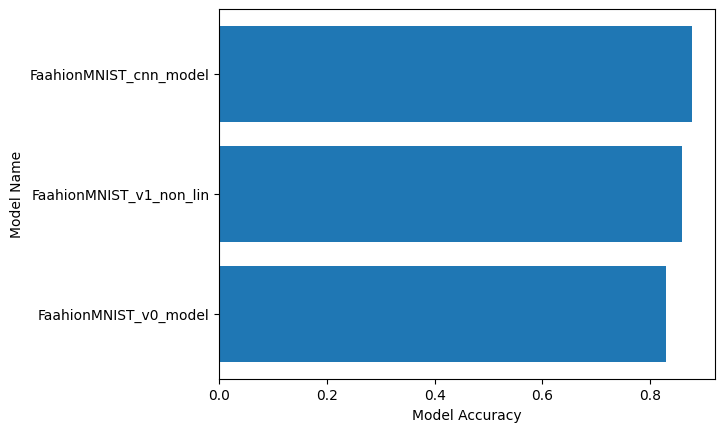

In [51]:
# Visualize the model results
plt.barh(comp_result["model_name"], comp_result["model_acc"])
plt.xlabel("Model Accuracy")
plt.ylabel("Model Name")
plt.show()

# 10.Visualize the Output based on best Model

In [52]:
# Make a function to get the prediction for any sample
def make_pred(model : nn.Module,
              data:list):
  pred_prob = []
  model.eval()
  with torch.inference_mode():
    for img, label in data:
      test_logits = model(img)
      test_pred_prob = torch.softmax(test_logits, dim=1)
      test_pred = test_pred_prob.argmax(dim=1)
      pred_prob.append(test_pred)
  return test_pred

In [53]:
len(list(test_data))

10000

## 10.1 Get plots for predictions

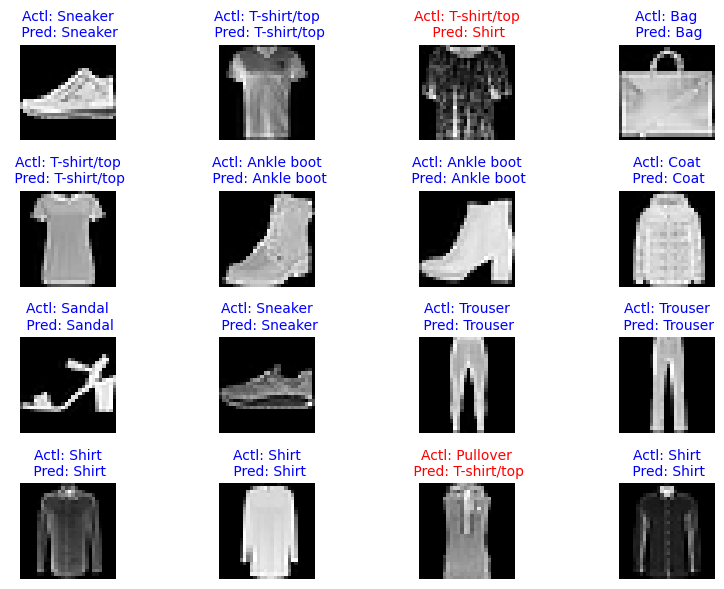

In [54]:
import random
random.seed(95)
test_samples = []
test_labels = []
pred_labels = []
for sample_data, label in random.sample(list(test_data),k=16):
  test_samples.append(sample_data)
  test_labels.append(label)
  pred_labels.append(make_pred(Model_2,[(sample_data.unsqueeze(0),label)]))

fig = plt.figure(figsize=(10,6))
r,c = 4,4

for i in range(r*c):
  img, label, predicted_label = test_samples[i], test_labels[i], pred_labels[i]
  fig.add_subplot(r,c,i+1)
  plt.imshow(img.squeeze(),cmap = "gray")
  if label == predicted_label:
    plt.title(f"Actl: {train_data.classes[label]}\n Pred: {train_data.classes[predicted_label]}", fontsize = 10, c= 'b')
  else:
    plt.title(f"Actl: {train_data.classes[label]}\n Pred: {train_data.classes[predicted_label]}", fontsize = 10, c= 'r')
  plt.axis(False)
  fig.tight_layout()
plt.show()

## 10.2 Evaluate classifdication model with COnfusion Matrix

1. Make prediction with trained model on test data
2. Used `torchmetrics.MulticlassConfusionMatrix` to get all confusion matrix results -- https://lightning.ai/docs/torchmetrics/stable/classification/confusion_matrix.html
3. We can also try using 'mlxtend.plotting.plot_confusion_matrix' -- https://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

In [55]:
# First predict for all test data using TinyVGG model

test_data_prediction_list = []
test_data_label_list = []
Model_2.eval()
with torch.inference_mode():
  for test_img, test_label in tqdm(test_data_batches):
    # 1. forward pass
    test_logits = Model_2(test_img).squeeze()
    test_pred_prob = torch.softmax(test_logits, dim=1)
    test_pred = test_pred_prob.argmax(dim=1)
    test_data_prediction_list.append(test_pred)
    test_data_label_list.append(test_label)
test_pred_tesnsor = torch.cat(test_data_prediction_list)
test_act_tesnsor = torch.cat(test_data_label_list)

  0%|          | 0/313 [00:00<?, ?it/s]

In [56]:
test_pred_tesnsor[0:10],test_act_tesnsor[0:10]

(tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]),
 tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]))

In [57]:
import mlxtend
mlxtend.__version__

'0.23.1'

In [58]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 22.1 MB/s eta 0:00:00


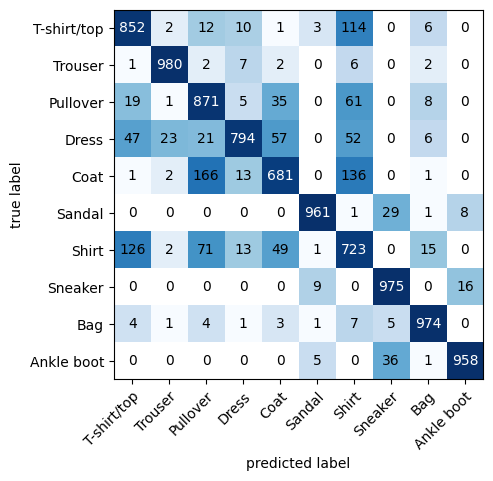

In [59]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib

# Set up confusion instance and compare pred to target
confmat = ConfusionMatrix(task = "multiclass", num_classes = len(train_data.classes))
confmat_tensor = confmat(preds = test_pred_tesnsor,target = test_act_tesnsor)

# Plot confusion Matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = test_data.classes,
    norm_colormap=matplotlib.colors.LogNorm()
)
plt.show()

# 11.Save and Load model for later Use

In [60]:
# save PyTorch model
from pathlib import Path

# 1. create Models directory
Model_path = Path("models")
Model_path.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
model_name = "tinyVGG_M2.pth"
model_save_path = Model_path / model_name

print(f"Saving TinyVGG model to: {model_save_path}")

# 3. Save model state dict
torch.save(obj=Model_2.state_dict(), f=model_save_path)

Saving TinyVGG model to: models/tinyVGG_M2.pth


In [61]:
# Load model

loaded_tinyvgg_model = FaahionMNIST_cnn_model(input_shape = 1, # number of color channels in the training image
                                         hidden_units = 10,
                                         output_shape = len(train_data.classes))
loaded_tinyvgg_model.load_state_dict(torch.load(model_save_path))

len(loaded_tinyvgg_model.state_dict())

<ipython-input-61-6d95956ef93a>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_tinyvgg_model.load_state_dict(torch.load(model_save_path))


10

In [62]:
# Check performance to match with earlier performance -- it should be 88.7%
eval_model(loaded_tinyvgg_model, test_data_batches,loss_fn, accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FaahionMNIST_cnn_model',
 'model_loss': 0.339631223830933,
 'model_acc': 0.876797124600639}

**Woahhhh! We have done a lot of coding. We built our first CNN. That's a huge milestone. Congratulations !!!**

Also go through the following resources for deeper study

1. MIT's Introduction to Deep Computer Vision lecture - https://www.youtube.com/watch?v=iaSUYvmCekI&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=3

2. torchvision.models library - https://pytorch.org/vision/stable/models.html

3. Torch Image Models by Ross Wightman -- large number of pretrained PyTorch computer vision models -- https://github.com/rwightman/pytorch-image-models/